# National Coding Week Excercises - R!

## What is this?
This is a jupyter notebook. It is set up with everything you need to have a go at coding in R/Python with the Daily Temperatures Dataset. The notebook is running in [Binder](https://mybinder.org/), a way of hosting interactive Notebooks with their data and dependencies.

If you have R installed you can download the notebook and data from [the GitHub repo](https://github.com/MatthewJWhittle/NCW2021) by clicking [this link (direct download of zipped repository)](https://github.com/MatthewJWhittle/NCW2021/archive/refs/heads/main.zip) to run it locally.

## How do I use it?
You can run code by clicking in the code cell and pressing `ctrl`/`cmd` + `enter` or clicking the run button (below)

<img src="images/run-code.png" alt="image" style="height:150px;padding:10px;"/>

You can insert a new code 'chunk' by clicking the + button at the top left of the page (right image) 

<img src="images/insert-code-chunk-1.png" alt="image" style="height:150px;padding:10px;"/>

...and selecting code or markdown with the dropdown (left image).

<img src="images/code-markdown.png" alt="image" style="height:150px;padding:10px;"/>


# Coding Challenges:

Try coding in R by having a go at one of our challenges.

## Inspiration: Questions to Answer:
* Which city has had the biggest or smallest temperature change?
* Can you convert the temperatures from farenheit to celcius?
* Can you make a plot of annual temperature changes for each city or region?
* Can you make a map of temperature changes?
* Which city has had the most days over 50C?
* Can you incorporate other datasets into your analysis?


# The Data

The dataset is a collection of daily temperature readings (daing back to 1995) from cities across the globe (split into 7 regions). It was [sourced from Kaggle](https://urldefense.com/v3/__https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities__;!!B5cixuoO7ltTeg!VmyCRKJvUbBaoB1rIWd1Ezp25KhK_RXICmsF3Tb54-BWsWlc7hoe52qBgCNaTSoekJyg$ ) ([original source](https://urldefense.com/v3/__https://academic.udayton.edu/kissock/http/Weather/default.htm__;!!B5cixuoO7ltTeg!VmyCRKJvUbBaoB1rIWd1Ezp25KhK_RXICmsF3Tb54-BWsWlc7hoe52qBgCNaTQqNH_NC$ )) and tidied up a bit to encode missing values and remove data before 995 (there were some readings for year 200 making it difficult to work with). 

The data is stored in the `data` folder. There is one csv of daily temperatures per region. A dataset of monthly mean temperatures for each city is also included in the `data` folder. This is easier to work with because it is much smaller than the daily temperature files. 

## Getting Started

If you are new to R and the tidyverse, have a read through [this cheatsheet](http://datacamp-community-prod.s3.amazonaws.com/c1fae72f-d2d7-4646-9dce-dd0f8fb5c5e8). It will give you the basics of processing and analysis.

# Basics

## Loading packages

R is built on packages which do different things. To use them you need to load them with `library(package_name)`. The following are already installed, load them using this code: 

In [2]:
library(readr)
library(dplyr)
library(tidyr)
library(ggplot2)
library(purrr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




## Loading the data
You can load the data using the `read_csv` function with the path to the file as the first argument. Don't forget to assign the result. 
E.g.

In [3]:
city_temps <- read_csv("data/monthly-mean-temps.csv")


-- Column specification --------------------------------------------------------
cols(
  Region = col_character(),
  Country = col_character(),
  State = col_logical(),
  City = col_character(),
  Year = col_double(),
  Month = col_double(),
  monthly_average = col_double()
)




To preview the data use the head function on the object you assigned the data to `city_temps`

In [4]:
head(city_temps)

Region,Country,State,City,Year,Month,monthly_average
<chr>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>
Africa,Algeria,NA,Algiers,1995,1,51.41935
Africa,Algeria,NA,Algiers,1995,2,54.80000
Africa,Algeria,NA,Algiers,1995,3,55.00000
Africa,Algeria,NA,Algiers,1995,4,57.19333
Africa,Algeria,NA,Algiers,1995,5,67.40968
Africa,Algeria,NA,Algiers,1995,6,71.72333


# Daily Temperatures

We can have a look at the daily temperatures data using the list files function (I'm displaying it as a tibble)

In [5]:
tibble(files = list.files("data", pattern = "daily", full.names = TRUE))

files
<chr>
data/daily-temperature-africa.csv
data/daily-temperature-asia.csv
data/daily-temperature-australia-south-pacific.csv
data/daily-temperature-europe.csv
data/daily-temperature-middle-east.csv
data/daily-temperature-north-america.csv


You can load all of the daily temperatures data into one data frame by reading each csv and binding them together:

In [6]:
files <- list.files("data", pattern = "daily", full.names = TRUE)
# Map applies a function to each element of a list
all_temps <- map(files, read_csv) %>% bind_rows()


-- Column specification --------------------------------------------------------
cols(
  Region = col_character(),
  Country = col_character(),
  State = col_logical(),
  City = col_character(),
  Month = col_double(),
  Day = col_double(),
  Year = col_double(),
  AvgTemperature = col_double()
)



-- Column specification --------------------------------------------------------
cols(
  Region = col_character(),
  Country = col_character(),
  State = col_logical(),
  City = col_character(),
  Month = col_double(),
  Day = col_double(),
  Year = col_double(),
  AvgTemperature = col_double()
)



-- Column specification --------------------------------------------------------
cols(
  Region = col_character(),
  Country = col_character(),
  State = col_logical(),
  City = col_character(),
  Month = col_double(),
  Day = col_double(),
  Year = col_double(),
  AvgTemperature = col_double()
)



-- Column specification --------------------------------------------------------
cols(
  Region 

## Summarising the data 

You can calculate summary statistics of the dataframe using the `group_by` and `summarise` functions.

In [7]:
regional_max <- 
    city_temps %>% 
    group_by(Region, Year) %>% 
    summarise(max_temp = max(monthly_average, na.rm = TRUE))

head(regional_max)

`summarise()` has grouped output by 'Region'. You can override using the `.groups` argument.



Region,Year,max_temp
<chr>,<dbl>,<dbl>
Africa,1995,94.89032
Africa,1996,94.43226
Africa,1997,93.88571
Africa,1998,96.16207
Africa,1999,93.69355
Africa,2000,95.22903


You can filter the dataset using the `filter` function. This will allow you to select rows using a logical condition. To learn more about filtering read this chapter of [R for Data Science](https://r4ds.had.co.nz/transform.html?q=filter#filter-rows-with-filter).

In [8]:
middle_east_ann_max <- regional_max %>% filter(Region == "Middle East")

head(middle_east_ann_max)

Region,Year,max_temp
<chr>,<dbl>,<dbl>
Middle East,1995,101.2129
Middle East,1996,102.2290
Middle East,1997,101.7742
Middle East,1998,103.3097
Middle East,1999,102.4548
Middle East,2000,103.1645


## Making a basic plot

You can make a basic plot of the data by using ggplot. For an introduction to ggplot, have a read of [this section in R for Data Science (Hadley Wickham)](https://r4ds.had.co.nz/data-visualisation.html#creating-a-ggplot).

The code below uses the filtered dataframe to plot the annual temperature maximums in the Middle East.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



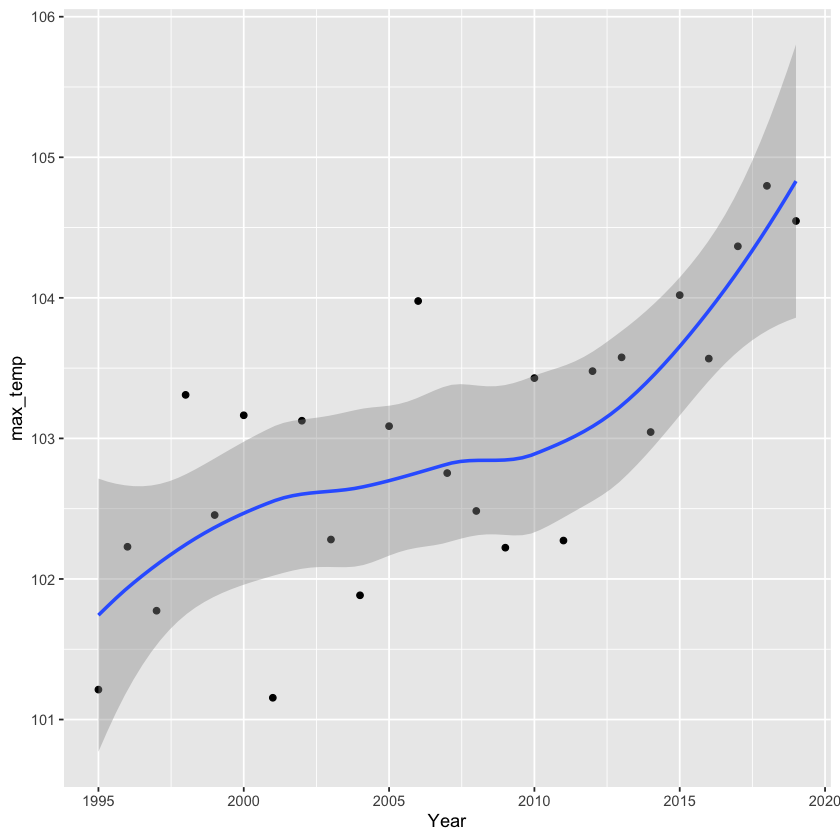

In [9]:
ggplot(middle_east_ann_max,
        aes(x = Year, y = max_temp)) + 
    geom_point() +
    geom_smooth()

# Which city has had the largest temperature change?

Let's look at one of the questions: where has the biggest change in temperature occured? There are few ways to look at this, the simplest is to compare between the average temperature in 1995 & 2019 for each city.

To compare them we will take the average temeperature by each city in 2019 and dividing it by the 1995 average (then subtracting one to get the +ive or -ive change). 

> Note there are more precise and better ways of doing this; this is just a simple example to show how to work around with data using Python and Pandas. In fact, to take this to a more advanced level, think about the following: 

* Is the data clean and ready to use? 
* How can we make this code more efficient? (using less lines of code?)
* How can we better answer this question? As it will be possible to see from the results of this answer taking the average duing one year gives innacurate results. How can this be avoided? Moreover, is it possible that the there are anomalies in the data (refering back to the first question above)?


# Code

The first step is to filter the data for temperatures in 1995 and 2019. This will return a dataframe with only temperatures from those years.

Then I need get the average temperature in each city for each year. To acheive this I need to 'group' and 'summarise' the data. This will reduce the dataset down to one row per group, with a summary value calculated from all values in that group. I am going to group the data by the `City` and `Year` variables, then I will calculate the mean temperature from the values in the `monthly_average` column for each group. 

> Note: I'm doing all of this in one go by using the pipe (`%>%`) to pass the output of each function to the next function. e.g. Read the pipe as 'then': take `city_temps` ***then*** `filter` for temperatures in 1995 & 2019 ***then*** `group_by` `City` and `Year` ***then*** `summarise` the `monthly_average` column using the `mean` function.

In [10]:
city_temps_1995_2019 <- 
    city_temps %>% 
    filter(Year %in% c(1995, 2019)) %>%
    group_by(City, Year) %>% 
    summarise(mean_annual_temp = mean(monthly_average, na.rm = TRUE)) 

head(city_temps_1995_2019)

`summarise()` has grouped output by 'City'. You can override using the `.groups` argument.



City,Year,mean_annual_temp
<chr>,<dbl>,<dbl>
Abidjan,1995,80.58819
Abidjan,2019,81.56387
Abilene,1995,63.32387
Abilene,2019,65.25076
Abu Dhabi,1995,80.61222
Abu Dhabi,2019,84.08602


Now I'm going to split the temperatures into two columns: temperatures for each city in 1995 and 2019. This will make it much easier to compare the change in temperatures.
I'm using the `pivot_wider` function to do this, specifying the column which the new columns names should come from (`names_from`) and where the values for the new clumns should come from `values_from`. I'm also adding a prefix to the new column names to make it easier to refer to them in R.

In [11]:
city_temps_1995_2019 <- 
    city_temps_1995_2019 %>% 
    pivot_wider(names_from = Year, values_from = mean_annual_temp, names_prefix = "year_")

head(city_temps_1995_2019)

City,year_1995,year_2019
<chr>,<dbl>,<dbl>
Abidjan,80.58819,81.56387
Abilene,63.32387,65.25076
Abu Dhabi,80.61222,84.08602
Addis Ababa,62.31405,63.33730
Akron Canton,49.13611,52.40353
Albany,48.59870,49.63842


Next it is possible to use dplyr verbs (`mutate`, `group_by` and `summarise`) to compare the temperatures. Once we've calculated summary statistics we can then visualise the data using `ggplot`.

In [12]:
temp_changes <- 
    city_temps_1995_2019 %>% 
    mutate(temp_change = (year_2019 / year_1995) - 1) 
head(temp_changes)

City,year_1995,year_2019,temp_change
<chr>,<dbl>,<dbl>,<dbl>
Abidjan,80.58819,81.56387,0.01210699
Abilene,63.32387,65.25076,0.03042913
Abu Dhabi,80.61222,84.08602,0.04309273
Addis Ababa,62.31405,63.33730,0.01642078
Akron Canton,49.13611,52.40353,0.06649726
Albany,48.59870,49.63842,0.02139401


Warning message:
"Removed 41 rows containing missing values (position_stack)."


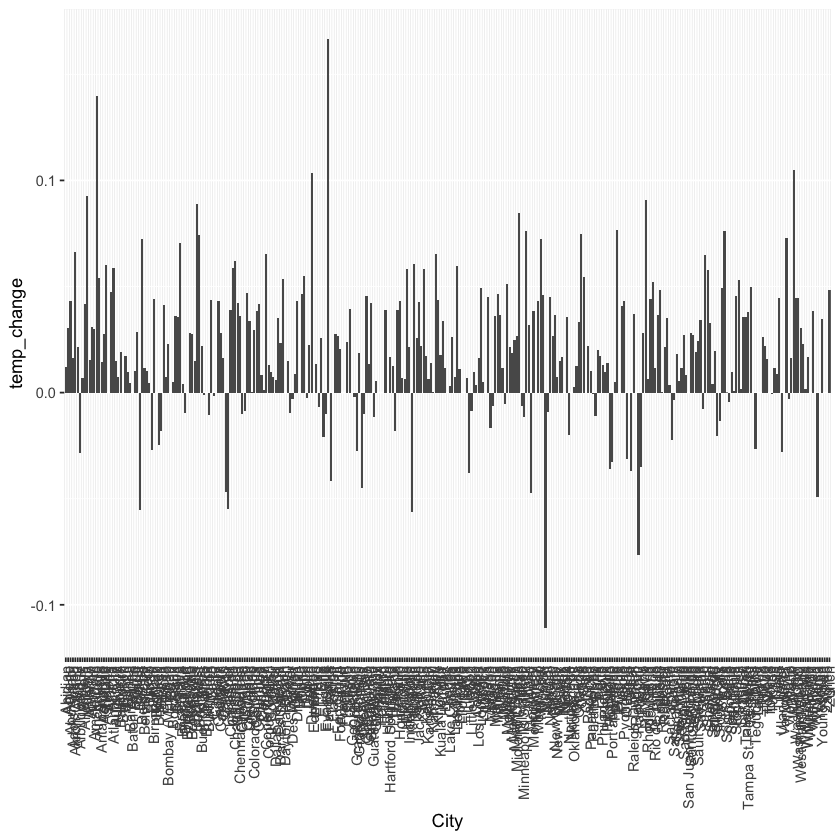

In [13]:
temp_changes %>% 
    # Map the data & variables to axis
    ggplot(aes(x = City, y = temp_change)) +
    # Plot as a bar
    geom_bar(stat = "identity") + 
    # Rotate the x labels
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))


Can you think of a better plot? Check out Matplotlib documentation and tutorials to learn all the cool things you can do!!

Now have a go and answer the rest of the questions! Feel free to take any approach you would like ! The purpose is to learn, have fun, and discover all the cool ways you can manage data with python (endless possibilities!).